 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [283]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [284]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

whale_df= pd.read_csv(whale_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [285]:
# Count nulls

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [286]:
# Drop nulls

whale_df.dropna(inplace=True)
print(whale_df.isnull().sum())
whale_df

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [287]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

algo_returns_df= pd.read_csv(algo_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [288]:
# Count nulls

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [289]:
# Drop nulls

algo_returns_df.dropna(inplace=True)
print(algo_returns_df.isnull().sum())
algo_returns_df.head()

Algo 1    0
Algo 2    0
dtype: int64


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [290]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

sp500_returns_df= pd.read_csv(sp500_history_csv, parse_dates=True, index_col= 'Date', infer_datetime_format=True)
sp500_returns= sp500_returns_df.sort_index(ascending=True)
sp500_returns

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [291]:
# Check Data Types

sp500_returns.dtypes

Close    object
dtype: object

In [292]:
# Fix Data Types

sp500_returns["Close"]= sp500_returns['Close'].str.replace('$', '').astype(float)
sp500_returns.dtypes

Close    float64
dtype: object

In [293]:
# Calculate Daily Returns

sp500_daily_returns = sp500_returns.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [294]:
# Drop nulls

sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [295]:
# Rename Column

columns= ["S&P 500"]
sp500_daily_returns.columns= columns
sp500_daily_returns

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [296]:
# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat([whale_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

From this graph it is difficult to determine if any portfolio  outperformed the S&P 500 because we are using daily returns. However, you can see that on certain days few portfolio's outperform the S&P 500. These days of outperformance DO NOT indicate that the portfolio as a whole outperformed the S&P 500 but do show that there are insances in which certain portfolios did outperform the benchmark.


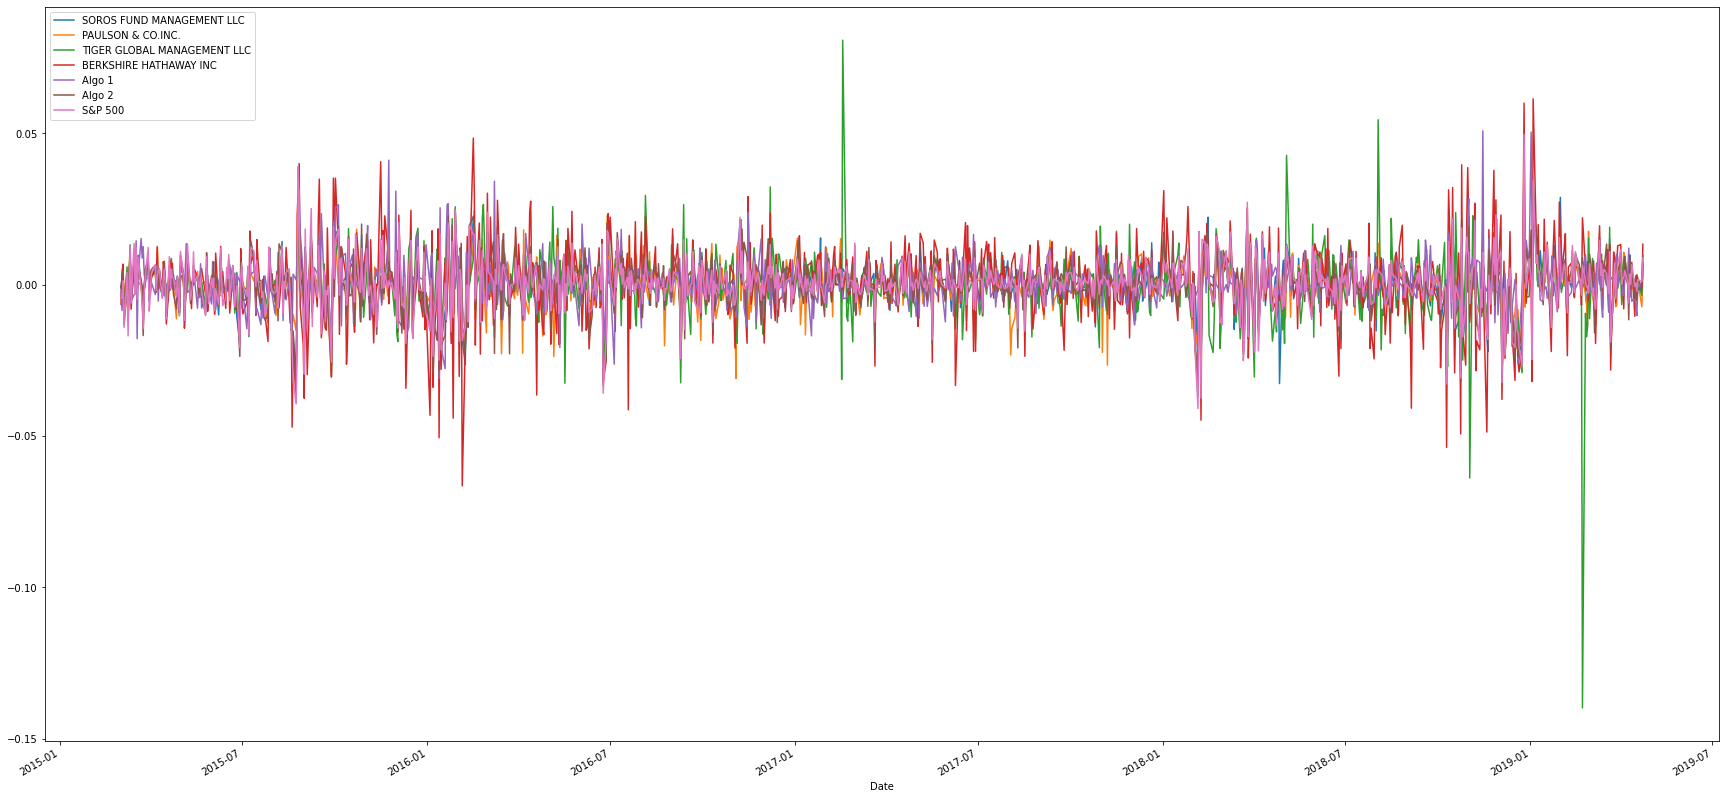

In [297]:
# Plot daily returns

combined_data.plot(figsize=(30,15))

print(f"From this graph it is difficult to determine if any portfolio  outperformed the S&P 500 because we are using daily returns. However, you can see that on certain days few portfolio's outperform the S&P 500. These days of outperformance DO NOT indicate that the portfolio as a whole outperformed the S&P 500 but do show that there are insances in which certain portfolios did outperform the benchmark.")

In this graph it is clear that Berkshire Hathaway and Algo 1 outperform the benchmark over time.


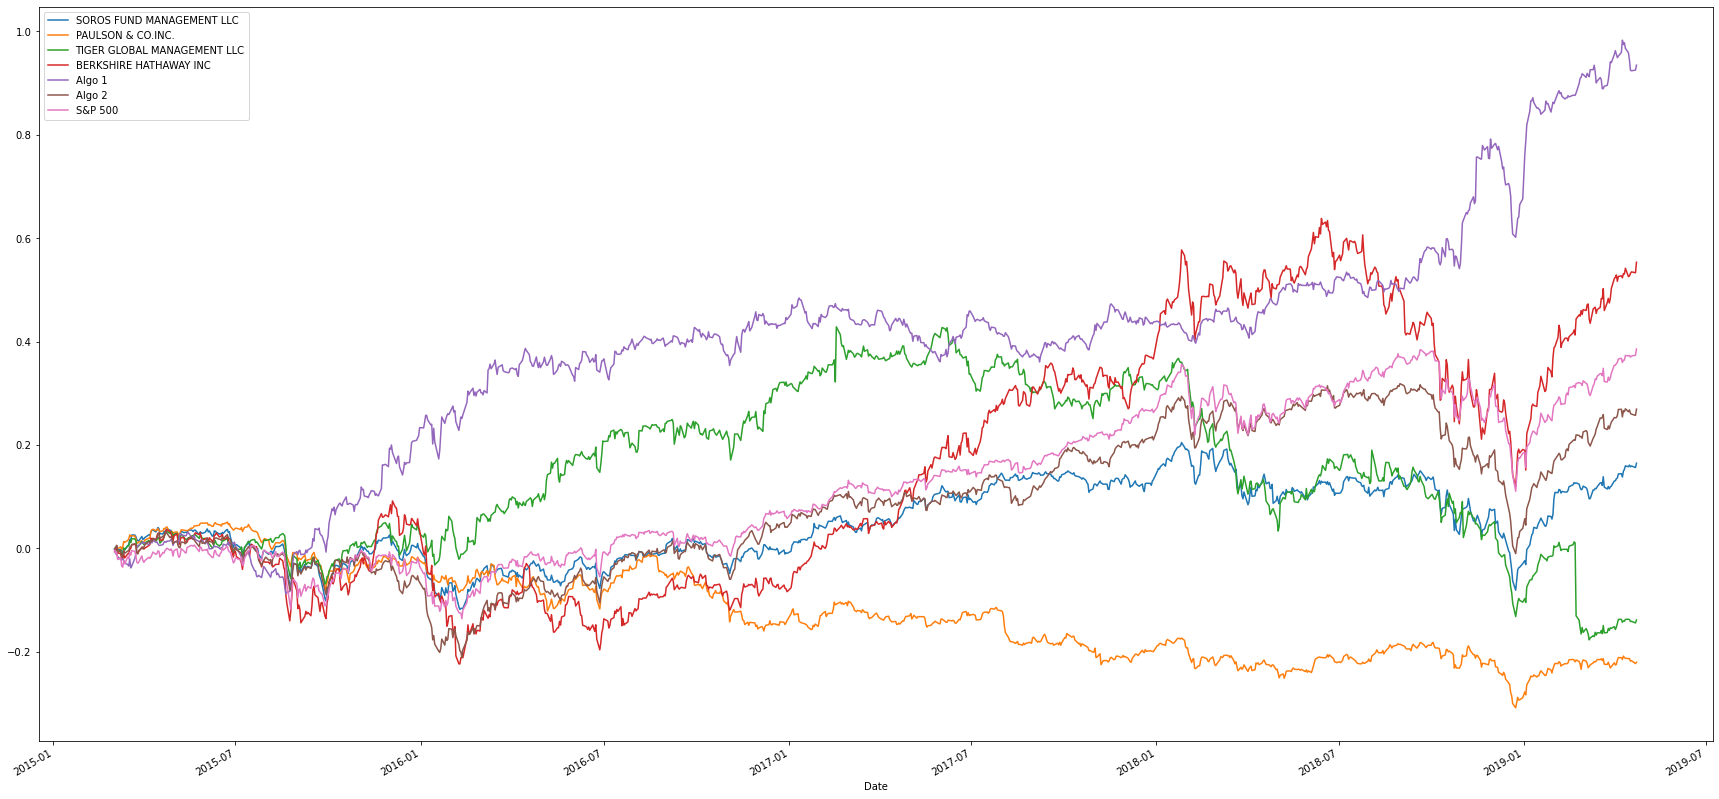

In [298]:
# Plot cumulative returns

cumulative_returns = (1 + combined_data).cumprod() - 1
cumulative_returns.plot(figsize=(30,15));
print(f"In this graph it is clear that Berkshire Hathaway and Algo 1 outperform the benchmark over time.")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

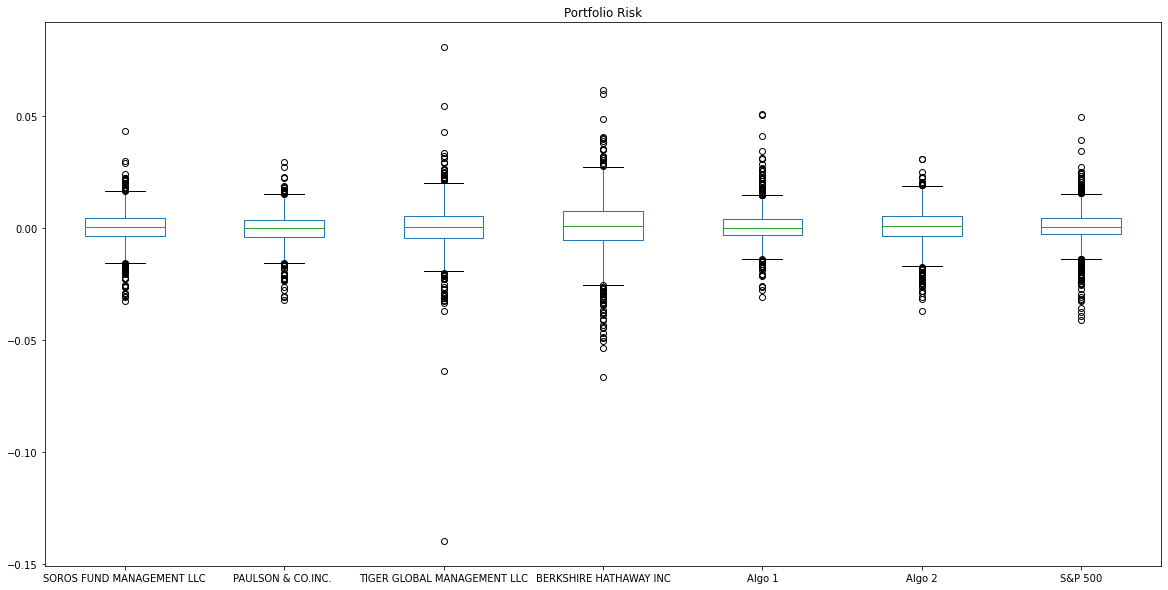

In [299]:
# Box plot to visually show risk

combined_data.plot.box(figsize=(20,10),fontsize=(10), title= "Portfolio Risk");

In [300]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
combined_data_std = combined_data.std().sort_values(ascending=True)
#print(combined_data_std)
combined_data_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [301]:
# Determine which portfolios are riskier than the S&P 500
for x in combined_data_std:
    if x > 0.008554:
        print("Yes")
    elif x<= 0.008554:
        print("No")

No
No
No
No
No
Yes
Yes


In [302]:
# Calculate the annualized standard deviation (252 trading days)

combined_data_std * np.sqrt(252)

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

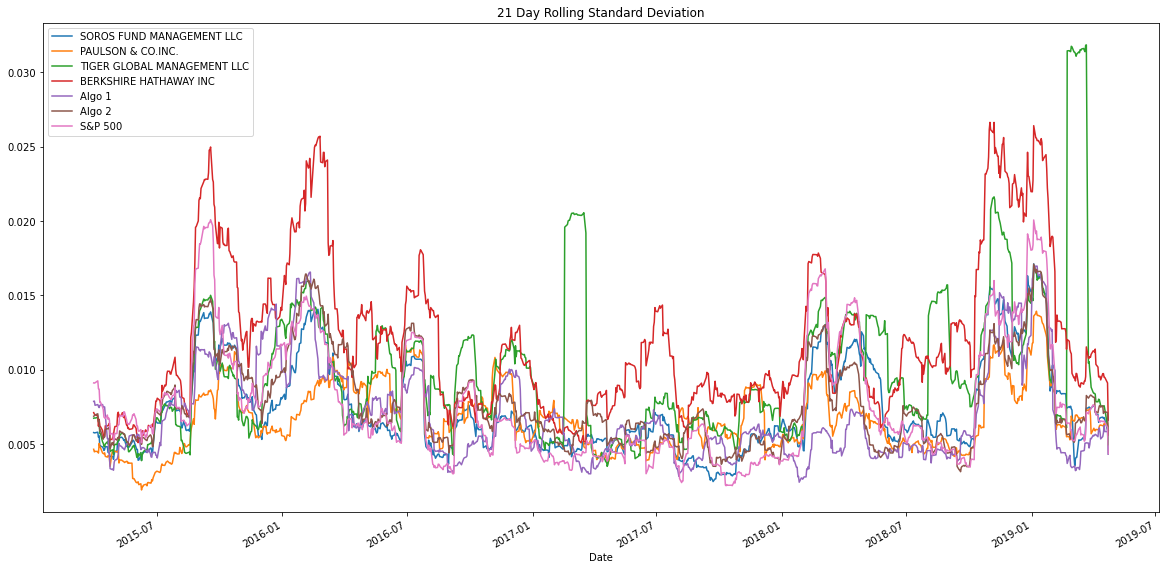

In [303]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_data_rolling_21 = combined_data.rolling(window=21).std().dropna()
combined_data_rolling_21.plot(figsize=(20,10), title= "21 Day Rolling Standard Deviation", fontsize=(10));

In [304]:
# Construct a correlation table
# YOUR CODE HERE
correlation= combined_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


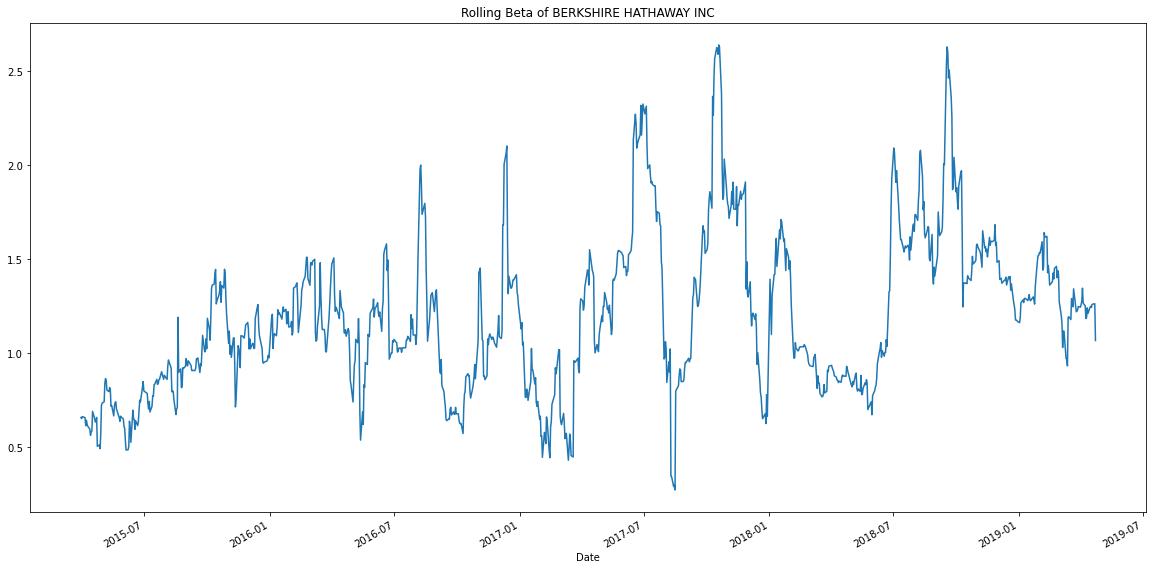

In [305]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
rolling_berkshire_covariance= combined_data['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_data["S&P 500"])
#print(berkshire_covariance)
rolling_variance= combined_data['S&P 500'].rolling(window=21).var()
#print(variance)
berkshire_beta = (rolling_berkshire_covariance / rolling_variance)
#print(berkshire_beta)
berkshire_beta.plot(figsize=(20,10), title="Rolling Beta of BERKSHIRE HATHAWAY INC");

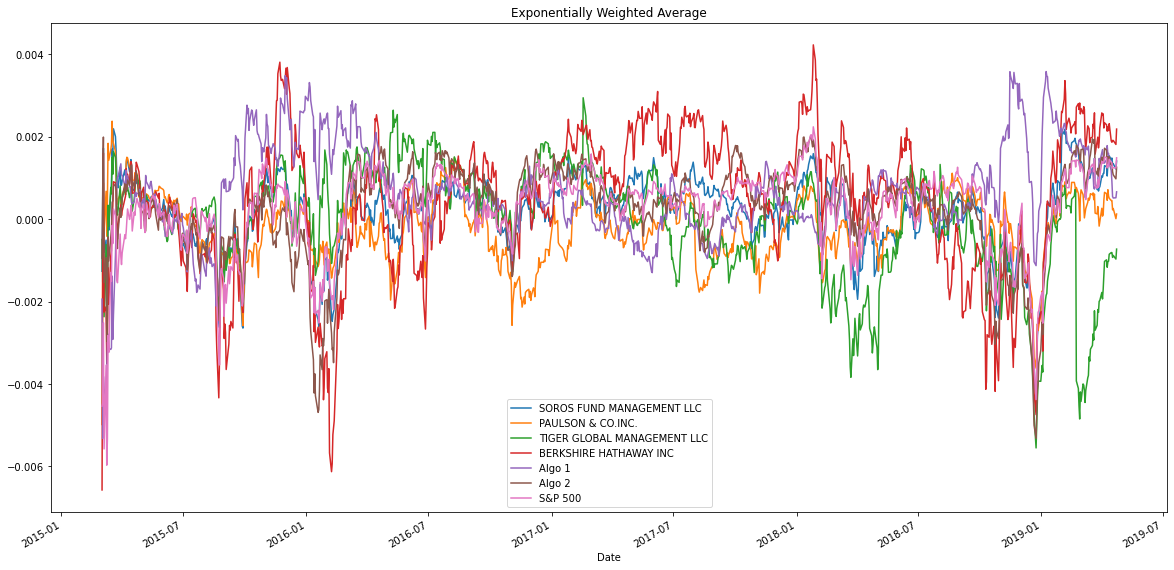

In [363]:
# Calculate a rolling window using the exponentially weighted moving average. 
rolling= combined_data.ewm(halflife=21,adjust=True,).mean()
rolling.plot(figsize=(20,10), title= "Exponentially Weighted Average");

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [307]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

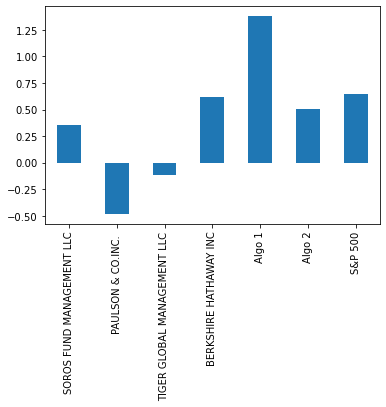

In [308]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar();

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [309]:
# Read the first stock
dpz_historical_csv = Path("Resources/dpz_historical.csv")
dpz_df = pd.read_csv(dpz_historical_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
dpz_df.head()

,Close
Date,
2017-01-03,158.36
2017-01-04,162.99
2017-01-05,162.77
2017-01-06,163.49
2017-01-07,164.51


In [310]:
# Read the second stock
amzn_historical_csv = Path("Resources/amzn_historical_closing.csv")
amzn_df = pd.read_csv(amzn_historical_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
amzn_df.head()

,Close
Date,
2017-01-03,753.67
2017-01-04,757.18
2017-01-05,780.45
2017-01-06,795.99
2017-01-07,796.92


In [311]:
# Read the third stock
nflx_historical_csv = Path("Resources/nflx_historical.csv")
nflx_df = pd.read_csv(nflx_historical_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
nflx_df.head()

,Close
Date,
2017-01-03,127.49
2017-01-04,129.41
2017-01-05,131.81
2017-01-06,131.07
2017-01-07,130.95


In [312]:
# Concatenate all stocks into a single DataFrame
phils_combined_data = pd.concat([dpz_df, amzn_df, nflx_df], axis="columns", join="inner")
phils_combined_data
portfolio_columns= ["DPZ","AMZN","NFLX"]
phils_combined_data.columns= portfolio_columns
phils_combined_data

,DPZ,AMZN,NFLX
Date,,,
2017-01-03,158.36,753.67,127.49
2017-01-04,162.99,757.18,129.41
2017-01-05,162.77,780.45,131.81
2017-01-06,163.49,795.99,131.07
2017-01-07,164.51,796.92,130.95
...,...,...,...
2019-07-17,381.81,3294.62,516.05
2019-07-18,376.32,3149.84,507.02
2019-07-19,382.07,3268.61,500.19


In [313]:
#Calculate Daily Returns
phils_daily_returns= phils_combined_data.pct_change()
phils_daily_returns

,DPZ,AMZN,NFLX
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,0.029237,0.004657,0.015060
2017-01-05,-0.001350,0.030732,0.018546
2017-01-06,0.004423,0.019912,-0.005614
2017-01-07,0.006239,0.001168,-0.000916
...,...,...,...
2019-07-17,-0.039472,-0.021787,-0.018450
2019-07-18,-0.014379,-0.043944,-0.017498
2019-07-19,0.015280,0.037707,-0.013471


In [314]:
# Pivot so that each column of prices represents a unique symbol
print("N/A")

N/A


In [315]:
# Drop Nulls
phils_portfolio= phils_daily_returns.dropna()
phils_portfolio

,DPZ,AMZN,NFLX
Date,,,
2017-01-04,0.029237,0.004657,0.015060
2017-01-05,-0.001350,0.030732,0.018546
2017-01-06,0.004423,0.019912,-0.005614
2017-01-07,0.006239,0.001168,-0.000916
2017-01-08,0.011246,-0.001280,-0.008095
...,...,...,...
2019-07-17,-0.039472,-0.021787,-0.018450
2019-07-18,-0.014379,-0.043944,-0.017498
2019-07-19,0.015280,0.037707,-0.013471


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [316]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
custom_df= phils_portfolio.dot(weights)
custom_df.head()

Date
2017-01-04    0.016318
2017-01-05    0.015976
2017-01-06    0.006240
2017-01-07    0.002164
2017-01-08    0.000624
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [317]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_portfolios= pd.concat([combined_data, custom_df], axis="columns", join="inner")
fixed_column_names = ["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC","Algo 1","Algo 2","S&P 500","Custom"]
all_portfolios.columns= fixed_column_names
all_portfolios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.012338
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.028113
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.020716
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.009032
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.013085


In [318]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
All_portfolio= all_portfolios.dropna()
All_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.005722,0.016318
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.000771,0.015976
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003517,0.006240
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,-0.003549,0.008082
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,0.000000,0.001544
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.012338
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.028113
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.020716


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [319]:
# Risk
porfolio_stds = All_portfolio.std().sort_values(ascending=True)
#print(porfolio_stds)
annualized_portfolio_std= porfolio_stds * np.sqrt(252)
print(annualized_portfolio_std)

Algo 1                         0.106695
PAULSON & CO.INC.              0.107732
Algo 2                         0.120169
SOROS FUND MANAGEMENT LLC      0.124795
S&P 500                        0.129174
TIGER GLOBAL MANAGEMENT LLC    0.188647
BERKSHIRE HATHAWAY INC         0.198369
Custom                         0.265394
dtype: float64


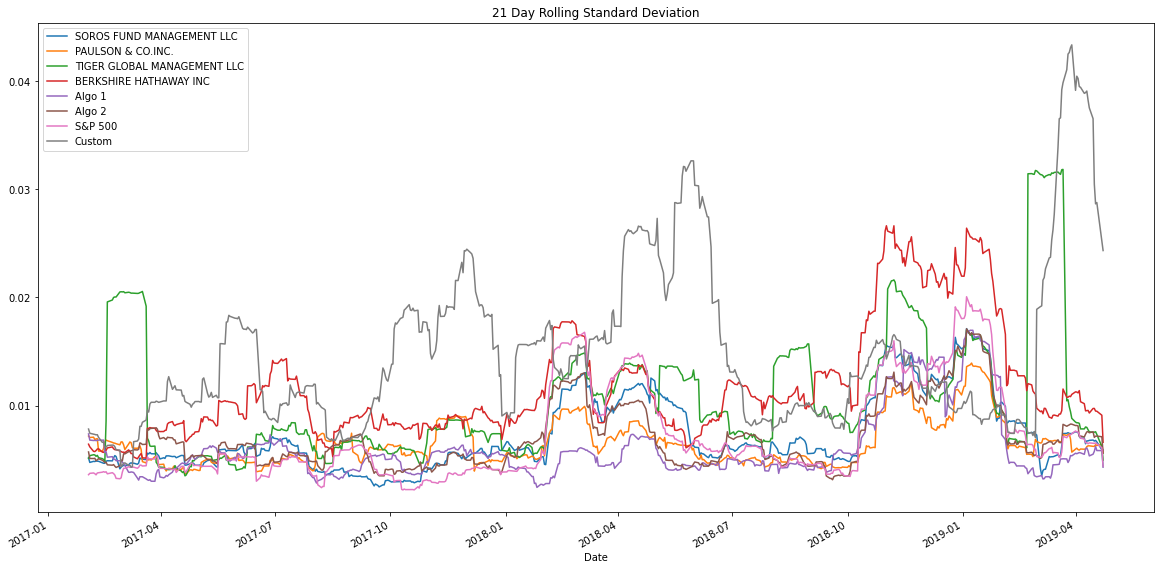

In [320]:
# Rolling
All_portfolio_rolling_21 = All_portfolio.rolling(window=21).std().dropna()
All_portfolio_rolling_21.plot(figsize=(20,10), title= "21 Day Rolling Standard Deviation", fontsize=(10));

In [321]:
# Annualized Sharpe Ratios
all_portfolio_sharpe_ratio = (All_portfolio.mean() * 252) / (All_portfolio.std() * np.sqrt(252))
all_portfolio_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.614773
PAULSON & CO.INC.             -0.404520
TIGER GLOBAL MANAGEMENT LLC   -0.888148
BERKSHIRE HATHAWAY INC         1.242706
Algo 1                         1.223376
Algo 2                         0.747427
S&P 500                        0.948652
Custom                         1.551262
dtype: float64

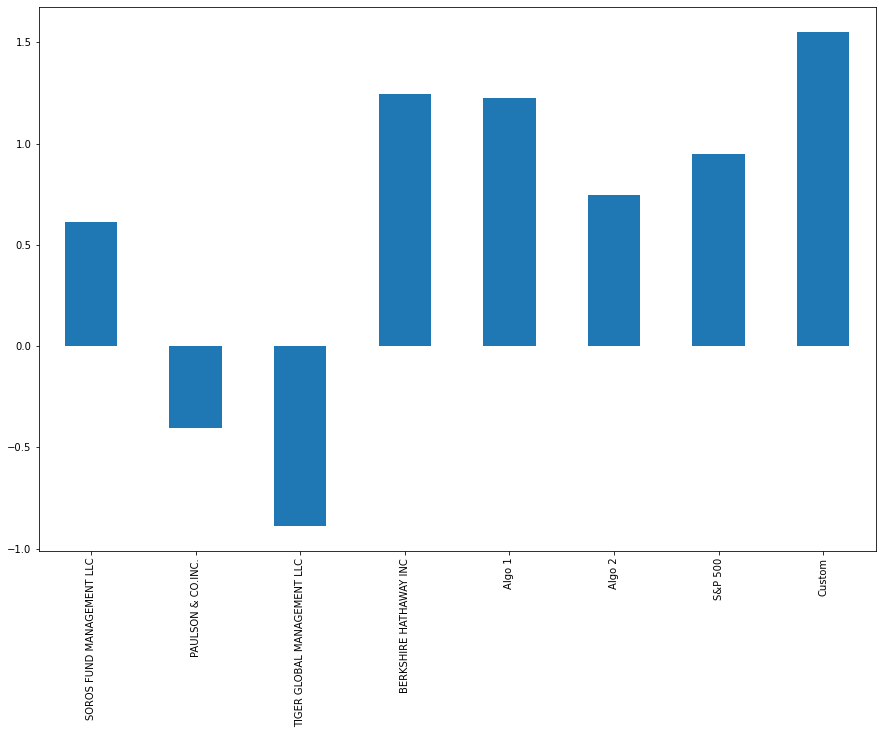

In [322]:
# Visualize the sharpe ratios as a bar plot
all_portfolio_sharpe_ratio.plot.bar(figsize=(15,10));

In [323]:
# Create a correlation analysis
# YOUR CODE HERE
portfolio_correlation= All_portfolio.corr()
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.686080,0.485794,0.761123,0.279254,0.797112,0.811876,0.026056
PAULSON & CO.INC.,0.686080,1.000000,0.419360,0.565238,0.285009,0.718771,0.694322,0.019001
TIGER GLOBAL MANAGEMENT LLC,0.485794,0.419360,1.000000,0.344809,0.090185,0.430232,0.525047,0.021237
BERKSHIRE HATHAWAY INC,0.761123,0.565238,0.344809,1.000000,0.240730,0.737636,0.798178,0.029242
Algo 1,0.279254,0.285009,0.090185,0.240730,1.000000,0.296016,0.248901,0.035812
Algo 2,0.797112,0.718771,0.430232,0.737636,0.296016,1.000000,0.864434,0.024471
S&P 500,0.811876,0.694322,0.525047,0.798178,0.248901,0.864434,1.000000,0.046816
Custom,0.026056,0.019001,0.021237,0.029242,0.035812,0.024471,0.046816,1.000000


In [328]:
# Beta
custom_portfolio_covariance= All_portfolio["Custom"].cov(All_portfolio["S&P 500"])
portfolio_variance= All_portfolio["S&P 500"].var()
custom_portfolio_beta = (custom_portfolio_covariance /portfolio_variance)
print(f"The Custom Portfolio's Beta is: {custom_portfolio_beta}")

The Custom Portfolio's Beta is: 0.09618493234617252


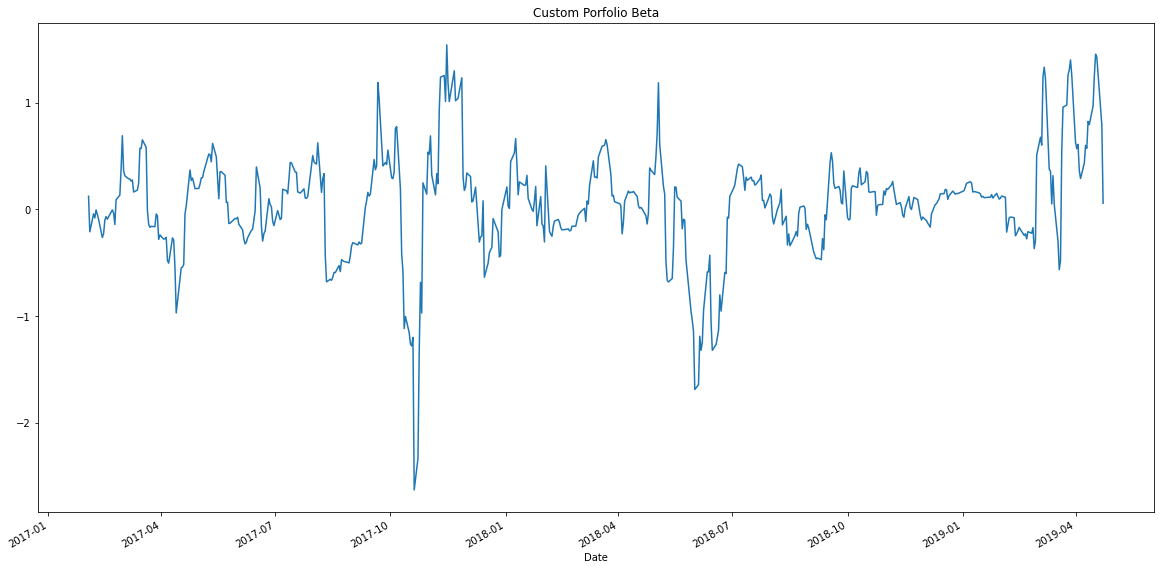

In [329]:
#The instructions ask for Beta, but the starter data has a line graph so my assumption is that the assignment actually wanted a rolling beta 
custom_portfolio_rolling_covariance= All_portfolio["Custom"].rolling(window=21).cov(All_portfolio["S&P 500"])
portfolio_rolling_variance= All_portfolio["S&P 500"].rolling(window=21).var()
custom_portfolio_rolling_beta= (custom_portfolio_rolling_covariance / portfolio_rolling_variance )
custom_portfolio_rolling_beta.plot(figsize=(20,10), title="Custom Porfolio Beta");